In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats

In [17]:
train = pd.read_csv('tokenized_train_data.csv')
test = pd.read_csv('tokenized_test_data.csv')
master = pd.concat([train, test])

In [27]:
train, test = train_test_split(master, test_size=0.25, random_state=42)
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 700)
# get X train 2d array of train features
X_train = vectorizer.fit_transform(train['tokenized_lyrics'].values).toarray()
vocab = vectorizer.get_feature_names()
# Train model
model = LogisticRegression(max_iter = 10000).fit(X_train, train['lr_valence'].values)

# create vectorizer for test data
test_vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 700, vocabulary= vocab)
# get X test 2d array of train features
X_test = test_vectorizer.fit_transform(test['tokenized_lyrics'].values).toarray()
# get test y predictions
# test_pred = model.predict(X_test)
# get train auc scores
# test_auc = roc_auc_score(test['lr_valence'].values, test_pred)
# test_auc_scores.append(test_auc)

scores = cross_val_score(model, X_test, test['lr_valence'].values, cv=100)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.5        0.375      0.875      0.75       0.875      0.625
 0.625      0.5        0.75       0.875      0.875      0.375
 0.75       0.625      0.625      0.5        0.375      0.625
 0.75       0.5        0.5        0.5        0.875      0.5
 0.28571429 0.28571429 0.28571429 0.57142857 0.71428571 0.42857143
 0.57142857 0.57142857 0.71428571 0.42857143 0.71428571 0.42857143
 0.28571429 0.42857143 0.42857143 0.42857143 0.57142857 0.85714286
 0.57142857 0.71428571 0.42857143 0.71428571 0.57142857 0.57142857
 0.57142857 0.57142857 0.71428571 0.57142857 0.71428571 0.57142857
 0.71428571 0.28571429 0.57142857 0.28571429 0.42857143 0.28571429
 0.42857143 0.42857143 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.85714286 0.28571429 0.57142857 0.85714286 0.42857143
 0.28571429 0.57142857 0.57142857 0.85714286 0.85714286 0.57142857
 0.57142857 0.42857143 0.28571429 0.42857143 0.14285714 0.71428571
 0.28571429 0.42857143 0.28571429 0.85714286 0.7142

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cross Validation Accuracy Scores')

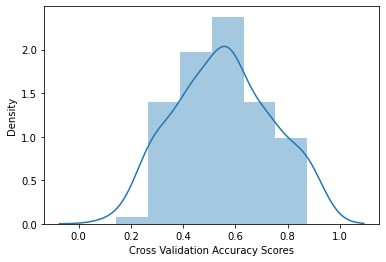

In [28]:
sns.distplot(scores, kde=True)
plt.xlabel('Cross Validation Accuracy Scores')
# plt.savefig("cross_val_hist.png")

In [29]:
tt, tpval = stats.ttest_1samp(scores,0.5)

In [30]:
tpval

0.0027604220119266023